<h1 style='color:red;text-align:center;'>Calories Burnt Prediction using Machine Learning</h1>

<h1>Problem Statement</h1>
    <p>
        Design and implement a <strong>calories prediction model</strong> to estimate the number of calories burned during physical activities based on demographic, physiological, and activity-related data. The goal is to build a regression model that accurately predicts the <strong>calories burned (Calories)</strong> using features such as age, gender, height, weight, activity duration, heart rate, and body temperature. This model can help in personalizing fitness plans and monitoring health.
    </p>
    <h2>Dataset Description</h2>
    <p>The dataset contains information about individuals, their demographic details, physiological measurements, and activity metrics, which can influence the number of calories burned. Below is a description of the dataset:</p>
    <table>
        <thead>
            <tr>
                <th>Feature</th>
                <th>Description</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td><strong>User_ID</strong></td>
                <td>Unique identifier for each individual in the dataset.</td>
            </tr>
            <tr>
                <td><strong>Calories</strong></td>
                <td>Number of calories burned (target variable for prediction).</td>
            </tr>
            <tr>
                <td><strong>Gender</strong></td>
                <td>Gender of the individual (male or female).</td>
            </tr>
            <tr>
                <td><strong>Age</strong></td>
                <td>Age of the individual in years.</td>
            </tr>
            <tr>
                <td><strong>Height</strong></td>
                <td>Height of the individual in centimeters (cm).</td>
            </tr>
            <tr>
                <td><strong>Weight</strong></td>
                <td>Weight of the individual in kilograms (kg).</td>
            </tr>
            <tr>
                <td><strong>Duration</strong></td>
                <td>Duration of the physical activity in minutes.</td>
            </tr>
            <tr>
                <td><strong>Heart_Rate</strong></td>
                <td>Average heart rate of the individual during the activity (beats per minute).</td>
            </tr>
            <tr>
                <td><strong>Body_Temp</strong></td>
                <td>Body temperature of the individual during the activity (in degrees Celsius).</td>
            </tr>
        </tbody>
    </table>
    <h2>Use Case</h2>
    <div class="use-case">
        <p>
            This model can be used in fitness applications to provide real-time feedback on calories burned during activities. It can also help health professionals and trainers design more effective and personalized fitness regimens based on individual characteristics.
        </p>
    </div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import preprocessing as ps

In [2]:
calories=pd.read_csv('calories.csv')
exercise=pd.read_csv('exercise.csv')
print('exercise',exercise.shape)
print('calories',calories.shape)
calories.head()

exercise (15000, 8)
calories (15000, 2)


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
df = pd.merge(calories, exercise, on='User_ID')
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
ps.dataset_analysis(df,'Calories')

Dataset Shape (Rows & Columns)
Rows :- 15000
Columns :- 9
Unique Rows: 15000 (100.00%)
Duplicate Rows: 0 (0.00%)

Columns with Null Values and Null Value Counts
No columns contain null values.

Data Type Wise Column Count
float64    6
int64      2
object     1
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : Gender


Discrete Numeric Columns : Age


Continuous Columns : User_ID, Calories, Height, Weight, Duration, Heart_Rate, Body_Temp


Unknown Columns : -----

Skewness of Numerical Columns
User_ID: 0.00 -> Approximately Symmetric. 
Calories: 0.51 -> Mild Positive Skew. 
Height: -0.01 -> Approximately Symmetric. 
Weight: 0.23 -> Approximately Symmetric. 
Duration: 0.00 -> Approximately Symmetric. 
Heart_Rate: -0.01 -> Approximately Symmetric. 
Body_Temp: -0.99 -> Mild Negative Skew. 

Constant Unique Values in Categorical Columns

Unique Values in Categorical Columns
Gender: ['female', 'male']

Age: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31

In [5]:
df=df.drop(['User_ID'],axis=1)

In [6]:
df.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
df.columns

Index(['Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

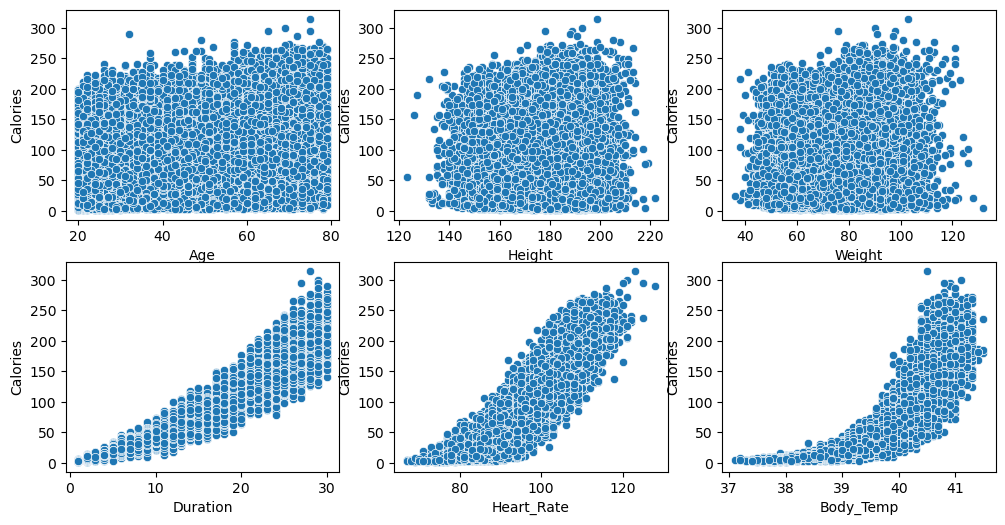

In [8]:
numerical_cols=['Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp']
plt.figure(figsize=(12,6))
for i,col in enumerate(numerical_cols):
    plt.subplot(2,3,i+1)
    sns.scatterplot(df,x=df[col],y=df['Calories'])

plt.show()

In [9]:
numerical_cols_df=df[['Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp','Calories']]
numerical_cols_df.corr()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


In [10]:
df=df.drop(['Weight','Height'],axis=1)

In [11]:
numerical_cols_df=df[['Age', 'Duration',
       'Heart_Rate', 'Body_Temp','Calories']]
numerical_cols_df.corr().style.background_gradient(cmap='viridis', subset=['Calories'])

,Age,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.013247,0.010482,0.013175,0.154395
Duration,0.013247,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.955421,0.897882,0.824558,1.000000


In [12]:
df.head()

,Calories,Gender,Age,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,29.0,105.0,40.8
1,66.0,female,20,14.0,94.0,40.3
2,26.0,male,69,5.0,88.0,38.7
3,71.0,female,34,13.0,100.0,40.5
4,35.0,female,27,10.0,81.0,39.8


<Axes: ylabel='Gender'>

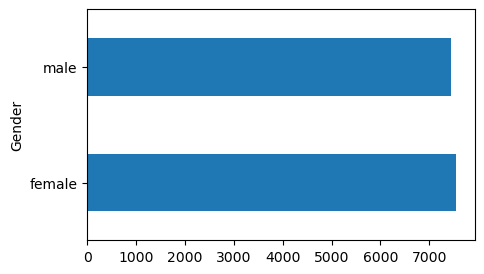

In [13]:
plt.figure(figsize=(5,3))
df['Gender'].value_counts().plot(kind='barh')

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [15]:
df.head()

,Calories,Gender,Age,Duration,Heart_Rate,Body_Temp
0,231.0,1,68,29.0,105.0,40.8
1,66.0,0,20,14.0,94.0,40.3
2,26.0,1,69,5.0,88.0,38.7
3,71.0,0,34,13.0,100.0,40.5
4,35.0,0,27,10.0,81.0,39.8


In [16]:
df.corr().style.background_gradient(cmap='viridis', subset=['Calories'])

,Calories,Gender,Age,Duration,Heart_Rate,Body_Temp
Calories,1.000000,0.022357,0.154395,0.955421,0.897882,0.824558
Gender,0.022357,1.000000,0.003222,0.003440,0.011555,0.007264
Age,0.154395,0.003222,1.000000,0.013247,0.010482,0.013175
Duration,0.955421,0.003440,0.013247,1.000000,0.852869,0.903167
Heart_Rate,0.897882,0.011555,0.010482,0.852869,1.000000,0.771529
Body_Temp,0.824558,0.007264,0.013175,0.903167,0.771529,1.000000


In [17]:
df.columns

Index(['Calories', 'Gender', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp'], dtype='object')

In [18]:
x=df[['Age', 'Duration', 'Heart_Rate', 'Body_Temp']]
y=df['Calories']

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

# Fit and transform the data
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def train_model(model, model_name, x_train, y_train, x_test, y_test, is_classification=True):
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predictions on the training data
    y_train_pred = model.predict(x_train)
    # Predictions on the testing data
    y_test_pred = model.predict(x_test)
    
    # Collecting results in a dictionary
    model_results = {
        'model': model_name
    }
    
    if is_classification:
        # Classification metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        model_results['train_accuracy'] = train_accuracy
        model_results['test_accuracy'] = test_accuracy
        
        # Generate classification report for testing data (optional)
        report = classification_report(y_test, y_test_pred, output_dict=True)
        model_results['classification_report'] = report
    else:
        # Regression metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        model_results['train_mse'] = train_mse
        model_results['test_mse'] = test_mse
        model_results['train_rmse'] = train_rmse
        model_results['test_rmse'] = test_rmse
        model_results['train_mae'] = train_mae
        model_results['test_mae'] = test_mae
        model_results['train_r2'] = train_r2
        model_results['test_r2'] = test_r2
    
    return model_results
    
model_list = dict(
    linear_regression=LinearRegression(),
    ridge=Ridge(alpha=1.0),
    lasso=Lasso(alpha=0.1),
    svr=SVR(kernel='rbf'),
    decision_tree=DecisionTreeRegressor(random_state=42),
    random_forest=RandomForestRegressor(n_estimators=50, random_state=42),
    xgboost=xgb.XGBRegressor(max_depth=1),
    catboost=cb.CatBoostRegressor(iterations=100, learning_rate=0.01, depth=3, verbose=0),
    gradientboost=GradientBoostingRegressor(n_estimators=100, random_state=42),
    adaboost=AdaBoostRegressor(n_estimators=100, random_state=42),  # Added AdaBoost
    lightgbm=lgb.LGBMRegressor(n_estimators=100, random_state=42)  # Added LightGBM
)

# Assume you have your x_train, x_test, y_train, and y_test already defined
results = []
for key, value in model_list.items():
    # Check if classification or regression model and train accordingly
    is_classification =False  # change as per your use-case for classification vs regression
    model_results = train_model(value, key, x_train, y_train, x_test, y_test, is_classification)
    results.append(model_results)

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Print or return the results DataFrame
results_df


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 10050, number of used features: 4
[LightGBM] [Info] Start training from score 88.926070


,model,train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r2,test_r2
0,linear_regression,128.133285,135.954429,11.319597,11.659950,8.301636,8.459840,0.966925,0.965600
1,ridge,128.133555,135.961006,11.319609,11.660232,8.301128,8.459449,0.966925,0.965599
2,lasso,128.342684,136.292055,11.328843,11.674419,8.287014,8.449567,0.966871,0.965515
3,svr,74.559780,84.687300,8.634801,9.202570,5.323026,5.565509,0.980754,0.978572
4,decision_tree,0.981277,111.507424,0.990594,10.559708,0.138275,6.668586,0.999747,0.971786
5,random_forest,9.139211,63.545486,3.023113,7.971542,1.964798,5.275974,0.997641,0.983922
6,xgboost,97.236942,106.118358,9.860879,10.301377,7.386179,7.663440,0.974901,0.973150
7,catboost,812.019523,844.669728,28.495956,29.063202,22.309917,22.585216,0.790396,0.786279
8,gradientboost,47.227585,56.007903,6.872233,7.483843,4.925052,5.225776,0.987809,0.985829
9,adaboost,146.766711,149.296462,12.114731,12.218693,9.714174,9.786339,0.962116,0.962225


In [21]:
model=lgb.LGBMRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

import pickle

with open('calories_burnt_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 10050, number of used features: 4
[LightGBM] [Info] Start training from score 88.926070
